<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROGRAM 6:**

Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.



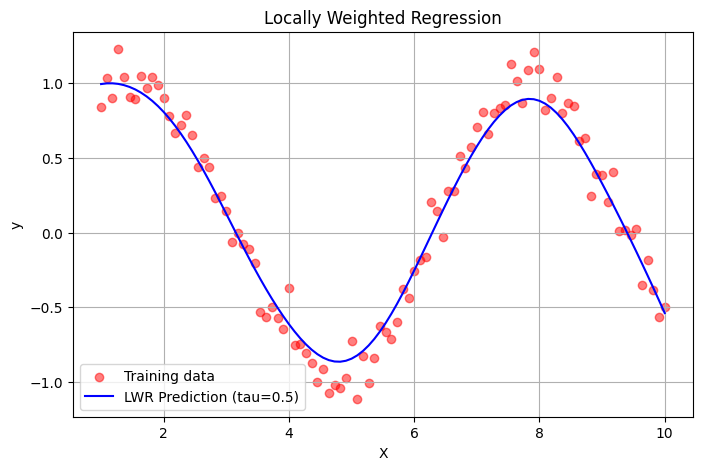

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(1, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape[0])

X = X[:, np.newaxis]

# Add a column of ones to X (bias term)
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Gaussian Kernel function for weights
def gaussian_kernel(x0, X, tau):
    return np.exp(-np.sum((X - x0)**2, axis=1) / (2 * tau**2))

# Locally Weighted Regression
def predict_lwr(x0, X, y, tau):
    m = X.shape[0]
    X_bias = add_bias(X)
    x0_bias = np.array([1, x0]).reshape(1, 2)

    weights = gaussian_kernel(x0_bias, X_bias, tau)
    W = np.diag(weights)

    # theta = (X'WX)^-1 X'Wy
    XTWX = X_bias.T @ W @ X_bias
    XTWy = X_bias.T @ W @ y
    theta = np.linalg.pinv(XTWX) @ XTWy

    return x0_bias @ theta

# Prediction over a grid
tau = 0.5
y_pred = np.array([predict_lwr(x[0], X, y, tau) for x in X])

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Training data', alpha=0.5)
plt.plot(X, y_pred, color='blue', label=f'LWR Prediction (tau={tau})')
plt.title("Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()